![logo](banner.jpg)

<h1><center><span style="color:blue">TASCA 10 - IT Academy</span></center></h1>
<h2><center><span style="color:blue">Curs Data Science</span></center></h2>

In [706]:
import pandas as pd
import numpy as np
from numpy import random
import pandas as pd
from datetime import datetime
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt

In [707]:
file = pd.read_csv('Red_Wine.csv')
file.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [708]:
file.shape

(8666, 8)

In [709]:
file.columns

Index(['Name', 'Country', 'Region', 'Winery', 'Rating', 'NumberOfRatings',
       'Price', 'Year'],
      dtype='object')

In [710]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8666 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.8+ KB


In [711]:
file['Year'].value_counts()

2016    1776
2017    1558
2015    1396
2018    1099
2014     798
2013     564
2012     371
2011     278
2010     174
2005     154
2019     116
2009      84
2008      80
2006      44
2007      43
2004      27
2000      19
1999      15
2001      12
2003      11
N.V.       8
1997       7
2002       7
1998       6
1996       5
1995       4
1992       3
1990       2
1989       2
1991       1
1993       1
1988       1
Name: Year, dtype: int64

In [757]:
# Vamos a sustituir los valores N.V. de la variable 'Year' de nuestra problación por la media de 'Year' ya que, como me ocurría
# más adelante, me impedía utilizar las funciones al tratarse la anotación N.V. de un string. 

file['Year']=file['Year'].replace({"N.V.": 2014.81})

In [720]:
# Vemos que el archivo ha eliminado las 8 filas que tenían valor V.N. en el parámetro 'Year'

file.shape

(8666, 8)

In [721]:
# Pasamos el tipo de dato 'Year' de Object a Integer

file['Year']=file['Year'].astype(int)
file['Year'].dtype

dtype('int32')

In [722]:
file.describe().round(3)

,Rating,NumberOfRatings,Price,Year
count,8666.000,8666.000,8666.000,8666.000
mean,3.890,415.287,39.145,2014.818
std,0.309,899.726,84.936,3.280
min,2.500,25.000,3.550,1988.000
25%,3.700,66.000,10.680,2014.000
50%,3.900,157.000,18.200,2016.000
75%,4.100,401.000,38.142,2017.000
max,4.800,20293.000,3410.790,2019.000


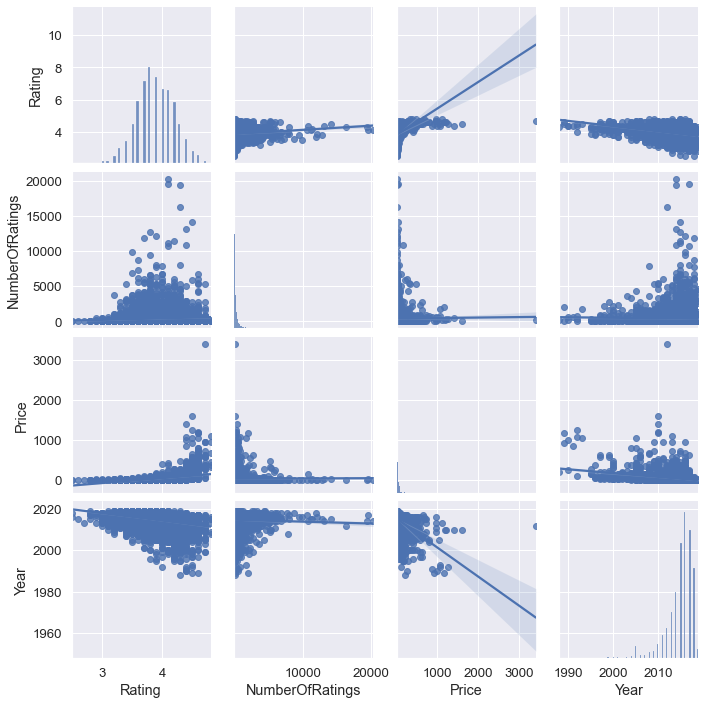

In [723]:
sns.pairplot(file, kind="reg")
plt.show()

### <span style="color:black">Exercici 1.</span>

__Agafa un conjunt de dades que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%:__ <span style="color:blue">__[X] Fet__</span>

In [552]:
# De la lista de 8666 vinos tintos, seleccionamos la variable "Rating", y formulamos la siguiente hipótesis:
# vamos a demostrar que las puntuación de un vino no está condicionada por las calificaciones otros vinos
# (será nuestra hipótesis nula), es decir que los datos de la variable 'Rating' son independientes entre sí. 

#H0: La muestra tiene una distribución normal, y por tanto los datos son independientes.
#H1: La nuestra no tiene una distribución normal, y por tanto los datos tienen cierta relación. 

In [553]:
# Vamos a tomar una muestra aleatroia de algo más del 10% nuestra población (file[Rating]). 

In [758]:
k = 900
dbSampleR = file['Rating'].sample(k)
dbSampleR.shape

(900,)

In [759]:
dbSampleR.head()

7382    3.7
6262    3.6
1537    3.8
899     3.6
7809    4.2
Name: Rating, dtype: float64

In [760]:
dbSampleR.describe().round(3)

count    900.000
mean       3.882
std        0.308
min        2.800
25%        3.700
50%        3.900
75%        4.100
max        4.700
Name: Rating, dtype: float64

Text(0.5, 0, 'SAMPLE - Rating (from 1 to 5)')

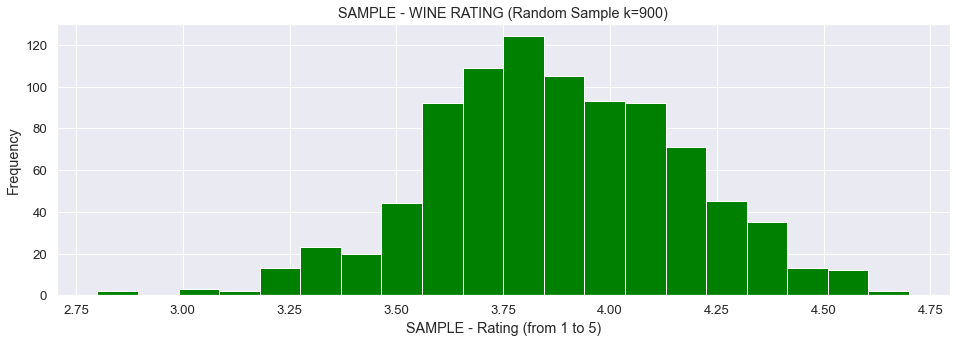

In [761]:
# Ahora vamos a visualizar nuestra muestra: vemos que la muestra de datos tiene una distribución gaussiana, es decir, 
# una distribución normal. 

dbSampleR.hist(bins=20, color='green')
plt.title('SAMPLE - WINE RATING (Random Sample k=900)')
plt.ylabel('Frequency')
plt.xlabel('SAMPLE - Rating (from 1 to 5)')

In [762]:
from scipy.stats import normaltest

data = dbSampleR
stat, p = normaltest(data)
print('stat=%.2f, p=%.2f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.51, p=0.77
Probably Gaussian


In [763]:
# En este caso P con valor 0.77, es mayor que el 5% de alfa (P>0.05), por lo que tenemos que aceptar la hipótesis nula: los 
# datos de la variable "Rating" son independientes entre si.

### <span style="color:black">Exercici 2.</span>

__Continua amb el conjunt de dades anterior i selecciona dos atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%:__ <span style="color:blue">__[X] Fet__</span>


In [560]:
# De la lista de 8666 vinos tintos, seleccionamos la variable "Rating" y "Price", y formulamos la siguiente hipótesis:
# como buena amante del vino, he podido constatar que un vino bueno no necesariamente tiene que ser caro, así que vamos a
# demostrar que la calidad/puntuación del vino no influye en su precio. 

#H0: las dos muestras son independientes.
#H1: existe una dependencia entre las muestras.

In [561]:
# Vamos a tomar una nueva muestra aleatroia de algo más del 10% nuestra población "Price" y luego compararemos esta muestra con
# la muestra extraída de "Rating" en el ejercicio anterior. 

In [737]:
k = 900
dbSampleP = file['Price'].sample(k)
dbSampleP.shape

(900,)

In [738]:
dbSampleP.head()

4992      7.62
5256     19.30
2029      8.28
8444     24.10
1990    258.30
Name: Price, dtype: float64

c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 0, 'SAMPLE - Price')

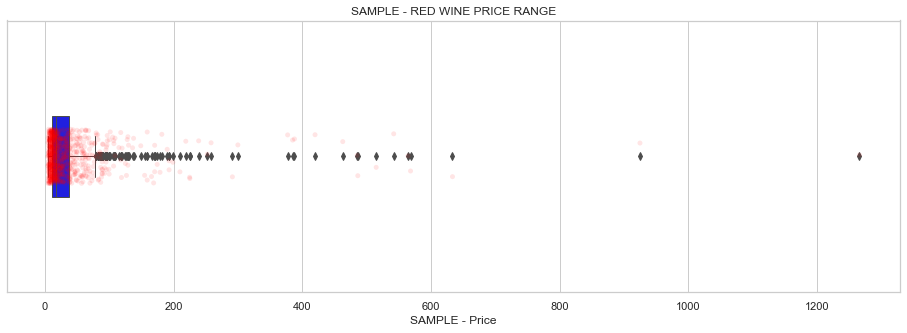

In [739]:
# Visualizamos la muestra vemos que los datos de la muestra tiene una gran concentración en el área que iría de los 5 alos 90 
# euros aproximadamente.

sns.set(style="whitegrid")
ax = sns.boxplot(x=dbSampleP, color='blue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(x=dbSampleP, orient='v', color='red', alpha=0.1)
plt.title('SAMPLE - RED WINE PRICE RANGE')
plt.xlabel('SAMPLE - Price')

In [637]:
# Como no sabemos si ambos parámetros estás relacionados, y si es así, si tienen una relación lineal o monónota, vamos a testear
# dos pruebas de hipótesis de correlación: de Pearson (lineal) y correlación de rango de Kendall (monótona).

In [638]:
# Vamos a visualizar la correlación entre ambas variables, y lo que observamos de entrada es que existen claramente outliers
# que quizá podrían desvirtuar nuestra muestra, así que vamos a continuación del gráfico vamos a proceder a eliminarlos.

c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


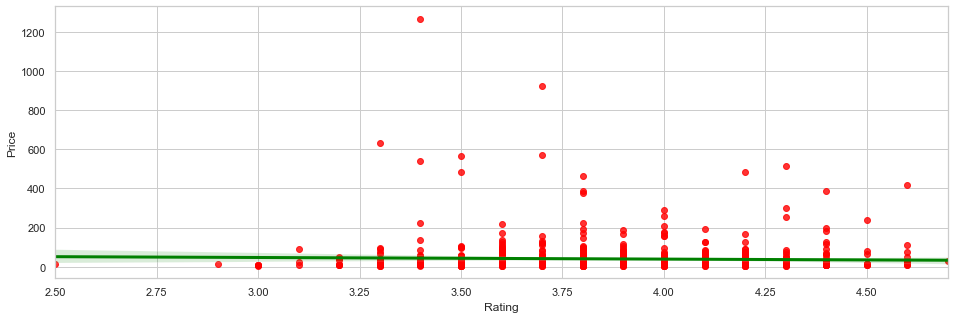

In [740]:
sns.regplot(dbSampleR,dbSampleP, color='red', line_kws={"color":"green","lw":3})
ax.set_xlabel('Rating')
ax.set_ylabel('Price');
plt.show()

In [741]:
#Vamos a eliminar todos aquellos outliers que queden por debajo del quantil 5 y por encima del 95. 

dbSampleP = dbSampleP[dbSampleP.between(dbSampleP.quantile(.05), dbSampleP.quantile(.95))]

In [742]:
dbSampleP.shape

(810,)

In [743]:
# Ahora nuestra muestra Precio tiene un tamaño de 810 en lugar de 900, así que tendremos que redimensionar la muestra de 
# "Rating" para que ambos parámetros tengan el mismo lenght.

k = 810
dbSampleR = file['Rating'].sample(k)
dbSampleR.shape

(810,)

c:\users\marta\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


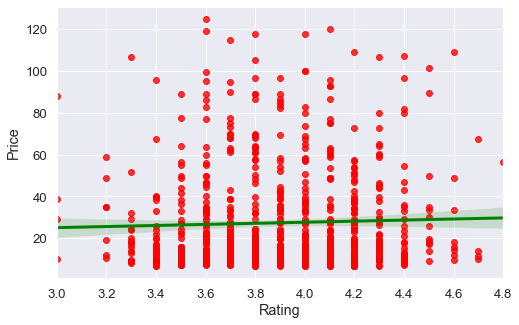

In [744]:
# Observamos en el gráfico que parece que no existe correlación, y mucho menos lineal, entre la variable precio y su puntuación.

sns.set(rc={'figure.figsize':(8,5)}, font_scale=1.2)
sns.regplot(dbSampleR, dbSampleP, color='red', line_kws={"color":"green","lw":3})
ax.set_xlabel('Rating')
ax.set_ylabel('Price');
plt.show()

In [342]:
# A continuación vamos a probar que no existe dicha correlación con las hipótesis estadística de Correlación de rango de Kendall
# y Correlación de rango de Spearman.

In [745]:
# SPEARMAN CORRELATION RANK

from scipy.stats import spearmanr

data1 = dbSampleR
data2 = dbSampleP

stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.035, p=0.317
Probably independent


In [746]:
# KENDALL CORRELATION RANK

from scipy.stats import kendalltau

data1 = dbSampleR
data2 = dbSampleP

stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.024, p=0.322
Probably independent


In [309]:
# En ambos casos las P's son claramente superiores a 0.05, por lo que podemos decir que queda comprobada nuestra hipótesis: Un 
# vino económico no  tiene pq tener una puntuación baja o un vino cara no tiene pq tener una puntuación muy alta. Hay vinos 
# económicos con muy buenas calificaciones. 

### <span style="color:black">Exercici 3.</span>

__Continua amb el conjunt de dades anterior i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%:__ <span style="color:blue">__[X] Fet__</span>

In [ ]:
# De la lista de 8666 vinos tintos, seleccionamos la variable "Rating", "Price" y "Year" y formulamos la siguiente hipótesis:
# antes hemos comprobado nuestra hipótesis que de que no existe correlación entre el precio del vino y su calificación. ¿Ocurre
# lo mismo con el año? ¿Influye el año en el precio del vino y en su calificación, por ejemplo? 

#H0: las tres muestras son independientes.
#H1: existe una dependencia entre las muestras.

In [747]:
Population = file[['Rating', 'Price', 'Year']].astype(float).copy()
Population.head()

,Rating,Price,Year
0,4.2,95.00,2011.0
1,4.3,15.50,2017.0
2,3.9,7.45,2015.0
3,3.5,8.72,2019.0
4,3.9,29.15,2016.0


In [748]:
# Vamos a tomar una nueva muestra aleatroia de 810 de nuestra población "Year", "Rating" y "Price".

k = 810
Sample = Population.sample(k)
Sample.shape

(810, 3)

In [749]:
Sample=Sample.sort_values(by='Year')

In [750]:
Sample.head()

,Rating,Price,Year
8056,4.4,1071.29,1992.0
4758,4.3,181.75,1995.0
7358,4.2,47.67,1997.0
7989,4.3,84.09,1999.0
7282,4.1,52.15,1999.0


In [751]:
Sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 8056 to 4009
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  810 non-null    float64
 1   Price   810 non-null    float64
 2   Year    810 non-null    float64
dtypes: float64(3)
memory usage: 25.3 KB


Text(0.5, 0, 'SAMPLE - Years')

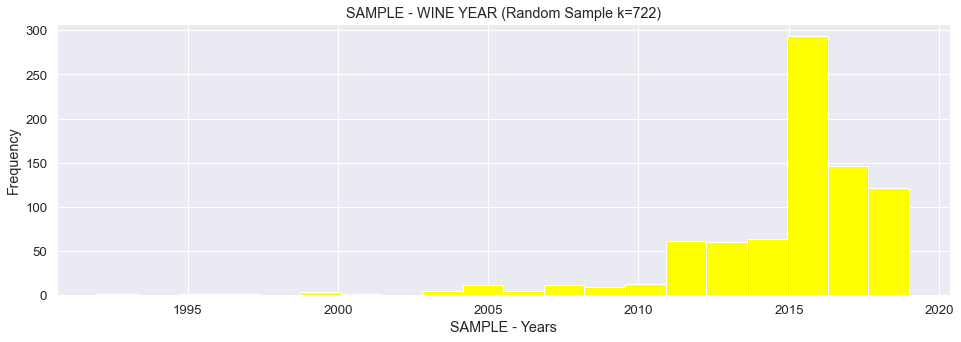

In [752]:
sns.set(rc={'figure.figsize':(16,5)}, font_scale=1.2)
Sample['Year'].hist(bins=20, color='yellow')
plt.title('SAMPLE - WINE YEAR (Random Sample k=722)')
plt.ylabel('Frequency')
plt.xlabel('SAMPLE - Years')

In [ ]:
# Vamos a visualizar a través de un paiplot de tipo regresión la relación entre las variables: 

In [753]:
Sample['Year']=Sample['Year'].astype(float)

In [754]:
Sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 8056 to 4009
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rating  810 non-null    float64
 1   Price   810 non-null    float64
 2   Year    810 non-null    float64
dtypes: float64(3)
memory usage: 25.3 KB


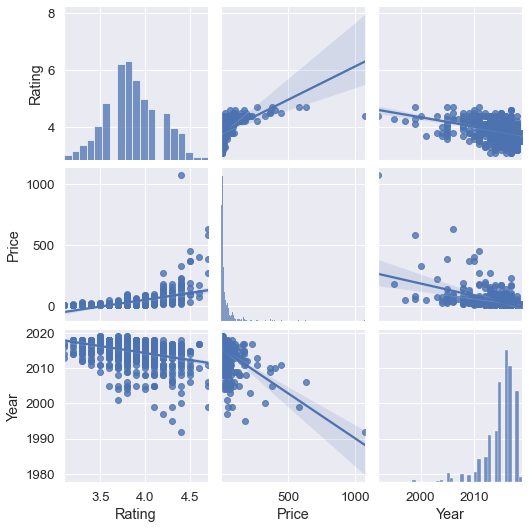

In [755]:
sns.pairplot(Sample, kind="reg")
plt.show()

In [756]:
from scipy.stats import f_oneway

data1 = Sample['Year']
data2 = Sample['Price']
data3 = Sample['Rating']
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=756617.415, p=0.000
Probably different distributions


In [ ]:
# La P en este caso es 0, por tanto P<0.05: parece que existe una dependencia entre las muestras tomadas. Es decir, que el año
# del vino sí que influye en el precio y la calificación del mismo. Viendo las líneas de regresión del pair plot existe una 
# relación negativa entre 'Year' y las otras dos variables: se entiende que cuanto menor és el año del vino (es decir,
# más antiguo), éste tiende a tener una calificación y un precio más alto. 